# Mushroom Classification 
## *By: Alexandria Ransom*
### Link to Dataset : https://www.kaggle.com/datasets/uciml/mushroom-classification
### Y-Target Variable: Mushroom Class (Column Name class)

### Import Required Modules

In [39]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

#### 1.) Do EDA Do EDA (do not modify the data, just look at it and visualize, try and understand the data).

In [5]:
df = pd.read_csv("C:\\Users\\AlexandriaRansom\\Downloads\\mushrooms.csv")

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


<AxesSubplot:xlabel='count', ylabel='class'>

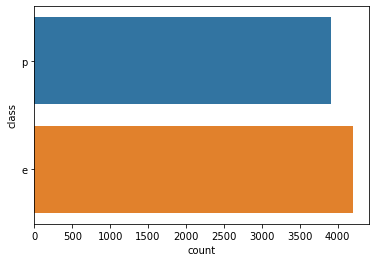

In [8]:
sns.countplot(y = "class", data = df) # very balanced 

#### 2.) Use train_test_split to create 2 variables: train, test.
#### 3.) Keep the test set aside, don't touch it until step 8.

Right away we see our target variable is very well balanced.

In [9]:
train, test = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 444, stratify = df['class'])

In [10]:
train.shape

(6499, 23)

In [11]:
test.shape

(1625, 23)

In [12]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7949,p,k,s,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
505,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,n,v,g
3502,e,f,f,e,t,n,f,c,b,n,...,s,p,p,p,w,o,p,k,y,d
2098,p,x,s,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
7465,p,k,s,e,f,s,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 7949 to 830
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   object
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-ring

In [14]:
train.drop('ring-type', axis = 'columns', inplace = True) # dropping a column that isn't nesscary 

In [15]:
train.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,spore-print-color,population,habitat
7949,p,k,s,e,f,s,f,c,n,b,...,s,s,p,w,p,w,o,w,v,l
505,p,x,s,n,t,p,f,c,n,n,...,s,s,w,w,p,w,o,n,v,g
3502,e,f,f,e,t,n,f,c,b,n,...,s,s,p,p,p,w,o,k,y,d


In [16]:
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,spore-print-color,population,habitat
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,1,4,3,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,p,w,o,w,v,d
freq,3366,2912,2605,1848,3790,2811,6338,5449,4483,1408,...,4149,3970,3585,3514,6499,6342,5991,1937,3225,2501


#### 4.) Do pre-processing like fixing data types, missing value imputation, one-hot-encoding.
#### 5.) Separate out the target (y) variable from the train set to create a train_X and train_y.

In [18]:
X_train = train.drop('class', axis = 'columns')
y_train = train[['class']]

In [19]:
cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = X_train.columns[X_train.dtypes != object] # still using nums to ensure that there is any hidden num data types 

In [20]:
cat_cols

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
num_cols

Index([], dtype='object')

In [22]:
ohe = OneHotEncoder()

In [23]:
ohe.fit(X_train[cat_cols])

OneHotEncoder()

In [24]:
cat_df = pd.DataFrame(ohe.transform(X_train[cat_cols]).toarray(), columns=ohe.get_feature_names_out(), index = X_train.index)

In [25]:
cat_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3502,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7465,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
num_df = X_train[num_cols]

In [27]:
X_train = pd.merge(num_df, cat_df, left_index = True, right_index = True)

In [28]:
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3502,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7465,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y_train.head()

,class
7949,p
505,p
3502,e
2098,p
7465,p


In [30]:
le = LabelEncoder()

In [31]:
le.fit(y_train.values.ravel())

LabelEncoder()

In [32]:
y_train['class'] = le.transform(y_train.values.ravel())

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_13724/1014600041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['class'] = le.transform(y_train.values.ravel())


In [33]:
y_train.head()

,class
7949,1
505,1
3502,0
2098,1
7465,1


In [40]:
models = {
          "KNN K-nearest neighbors": KNeighborsClassifier(),
          "Support Vector Machine": SVC(random_state=444), #random state ensures you will select same features all the time #gets trained the same way every time 
          "DecisionTreeClassifier": DecisionTreeClassifier(random_state=444),
          "RandomForestClassifier": RandomForestClassifier(random_state=444),
          "Logistic Regression": LogisticRegression(), 
          "GradientBoostingClassifier":  GradientBoostingClassifier(random_state=444),
          "Gaussian Naive Bayes": GaussianNB(),
          "Stochastic Gradient Descent": SGDClassifier(),
           "XGBClassifier": XGBClassifier()
         }

#### 6.) Do cross-validation on the train set to get the best performing model.

In [41]:
def crossValidate(models, X_train, y_train, cv, scoring):
    folds = KFold(n_splits=cv, shuffle=True, random_state=444)
    scoresDf = pd.DataFrame(columns=["modelName", "score"])
    for modelName, model in models.items():
        scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=folds, scoring=scoring)
        avg_score = np.mean(scores)
        scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
    scoresDf.sort_values(by='score', ascending=False, inplace=True, ignore_index=True)
    return scoresDf

In [42]:
#choosing evaluation metric of f1 score
scoresDf = crossValidate(models, X_train, y_train, cv=5, scoring='accuracy') 

In [43]:
scoresDf # decided to choose KNN , Random forest computationally expensive 

,modelName,score
0,KNN K-nearest neighbors,1.00000
1,Support Vector Machine,1.00000
2,DecisionTreeClassifier,1.00000
3,RandomForestClassifier,1.00000
4,Logistic Regression,1.00000
5,GradientBoostingClassifier,1.00000
6,Stochastic Gradient Descent,1.00000
7,XGBClassifier,1.00000
8,Gaussian Naive Bayes,0.92322


In [44]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 444)

#### 7.) Do hyper-parameter tuning on the best model to improve score even more.

In [45]:
#will still be hypertuning for the sake of demo purposes even though the model got 100 % :) 
param_grid=[{'metric':['euclidean', 'manhattan']}, 
             {'leaf_size': list(range(1,50))},
             {'n_neighbors':list(range(1,30))},
            {'p':[1,2]}]

In [46]:
randomsearch_model = RandomizedSearchCV(estimator = KNeighborsClassifier(),  
                           param_distributions= param_grid,
                           scoring = 'accuracy',
                           cv = folds,
                           verbose=0)


In [47]:
random_search = randomsearch_model.fit(X_train, y_train)

C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [48]:
random_search.best_estimator_ 

KNeighborsClassifier(leaf_size=3)

In [49]:
print('Best Penalty:', random_search.best_estimator_.get_params()['metric'])

Best Penalty: minkowski


In [50]:
print('Best Penalty:', random_search.best_estimator_.get_params()['leaf_size'])

Best Penalty: 3


In [51]:
print('Best Penalty:', random_search.best_estimator_.get_params()['n_neighbors'])

Best Penalty: 5


In [52]:
print('Best p:', random_search.best_estimator_.get_params()['p'])

Best p: 2


In [53]:
random_search.best_score_

1.0

In [54]:
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6782,p,x,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
1639,e,x,s,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
3008,e,f,f,e,t,n,f,c,b,p,...,s,g,w,p,w,o,p,k,y,d
5075,p,x,y,g,f,f,f,c,b,h,...,k,p,b,p,w,o,l,h,v,p
3725,p,x,s,w,f,c,f,w,n,g,...,s,w,w,p,w,o,p,n,v,d


#### 8.) Pre-process the test set using the exact same procedure that was done on the train set.

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 6782 to 2258
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1625 non-null   object
 1   cap-shape                 1625 non-null   object
 2   cap-surface               1625 non-null   object
 3   cap-color                 1625 non-null   object
 4   bruises                   1625 non-null   object
 5   odor                      1625 non-null   object
 6   gill-attachment           1625 non-null   object
 7   gill-spacing              1625 non-null   object
 8   gill-size                 1625 non-null   object
 9   gill-color                1625 non-null   object
 10  stalk-shape               1625 non-null   object
 11  stalk-root                1625 non-null   object
 12  stalk-surface-above-ring  1625 non-null   object
 13  stalk-surface-below-ring  1625 non-null   object
 14  stalk-color-above-rin

In [56]:
test.drop('ring-type', axis = 'columns', inplace = True)

In [57]:
test.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,spore-print-color,population,habitat
6782,p,x,y,e,f,y,f,c,n,b,...,s,s,w,p,p,w,o,w,v,p
1639,e,x,s,n,f,n,f,w,b,k,...,f,s,w,w,p,w,o,k,a,g
3008,e,f,f,e,t,n,f,c,b,p,...,s,s,g,w,p,w,o,k,y,d


In [58]:
test.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [59]:
test.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,spore-print-color,population,habitat
count,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625,...,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,8,9,1,3,3,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,p,w,o,w,v,d
freq,842,744,639,436,958,717,1576,1363,1129,320,...,1027,966,879,870,1625,1582,1497,451,815,647


#### 9.) Separate out the target (y) variable from the test set to create a test_X and test_y.


In [60]:
X_test = test.drop('class', axis = 'columns')
y_test = test[['class']]

In [61]:
cat_cols = X_test.columns[X_test.dtypes == object]
num_cols = X_test.columns[X_test.dtypes != object] # still using nums to ensure that there is any hidden num data types 

In [62]:
cat_cols

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [63]:
num_cols

Index([], dtype='object')

In [64]:
cat_df = pd.DataFrame(ohe.transform(X_test[cat_cols]).toarray(), columns=ohe.get_feature_names_out(), index = X_test.index)

In [65]:
cat_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6782,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1639,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5075,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3725,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
605,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
num_df = X_test[num_cols]

In [67]:
X_test = pd.merge(num_df, cat_df, left_index = True, right_index = True)

In [68]:
X_test.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6782,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1639,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5075,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3725,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
y_test.head()

,class
6782,p
1639,e
3008,e
5075,p
3725,p


In [70]:
y_test['class'] = le.transform(y_test.values.ravel())

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_13724/1438283850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['class'] = le.transform(y_test.values.ravel())


In [71]:
y_test.head()

,class
6782,1
1639,0
3008,0
5075,1
3725,1


#### 10.) Make predictions using the best model.


In [72]:
y_preds = random_search.best_estimator_.predict(X_test)

In [73]:
y_preds

array([1, 0, 0, ..., 1, 0, 0])

In [74]:
y_test

,class
6782,1
1639,0
3008,0
5075,1
3725,1
...,...
4592,1
4241,1
1777,1
605,0


In [75]:
accuracy_score(y_test, y_preds)

1.0